In [1]:
import sympy as sp
from sympy.plotting import plot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Funkcja i jej pochodna


f(x) =  x**2 - 2
f'(x) =  2*x


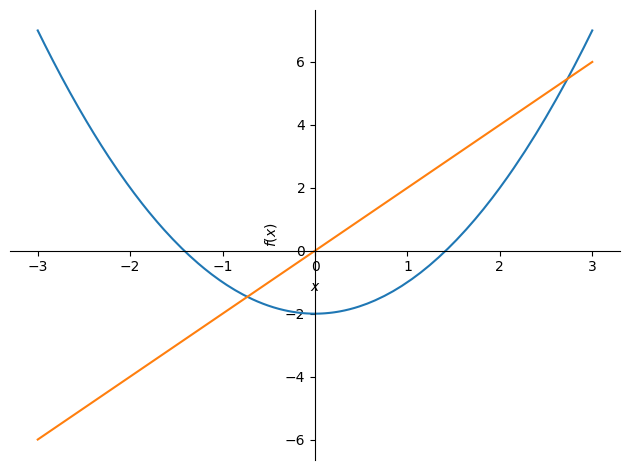

In [2]:
x = sp.symbols('x')

f = x**2-2
print("f(x) = ",f)

fd = sp.diff(f,x)
print("f'(x) = ",fd)

p = sp.plot((f,(x, -3, 3)),(fd,(x,-3,3)))

## Funkcja wielu zmiennych
### Funkcja wielu zmiennych posiada więcej niz jeden argument rzeczywisty. 
$f(x_1, x_2,...,n_n) = ...$



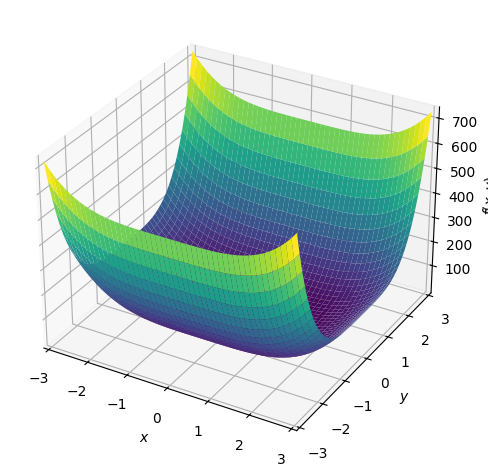

In [3]:
x, y = sp.symbols("x, y")

f = 2*x**4 + 7*y**4 

g = plot3d(f, (x, -3, 3), (y, -3, 3))

## Pochodne cząstkowe

Pochodna cząstkowa funkcji wielu zmiennych (wyznaczana ze względu na zmienną $x_i$)- pochodna wyznaczana przy założeniu, że zmienna $x_i$ jest jedyną zmienną, zaś wszystkie pozostałe zmienne są traktowane jako stałe.

In [4]:
# Partial first derivatives

x, y = sp.symbols("x, y")

f = 2*x**4 + 7*y**4 

print(f)

df_dx = sp.diff(f,x)
df_dy = sp.diff(f,y)

print("df_dx = ",df_dx)
print("df_dy = ", df_dy)


2*x**4 + 7*y**4
df_dx =  8*x**3
df_dy =  28*y**3


## Gradient

Gradient = wektor pochodnych cząstkowych.

Gradient funkcji $f$: 

$$\triangledown f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ ...\\  \frac{\partial f}{\partial x_n}\end{bmatrix}$$

# Regresja liniowa

Model:

$$
y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n + \varepsilon
$$


In [5]:
dane_x = np.array([52, 76, 56, 19, 20, 29, 76, 17, 44, 56])
dane_y = np.array([23, 65, 20, 27, 49, 15, 83, 43, 80, 66])

In [6]:
x = dane_x.reshape(-1,1)
y = dane_y

In [7]:
x,y

(array([[52],
        [76],
        [56],
        [19],
        [20],
        [29],
        [76],
        [17],
        [44],
        [56]]),
 array([23, 65, 20, 27, 49, 15, 83, 43, 80, 66]))

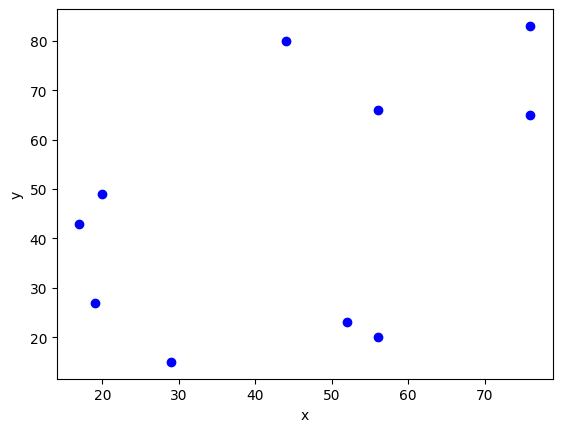

In [8]:
plt.plot(x[:,0],y,"ob")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
model_LR = LinearRegression()

In [10]:
model_LR.fit(x,y)

LinearRegression()

In [11]:
model_LR.coef_

array([0.5446458])

In [12]:
model_LR.intercept_

22.863261943986828

In [13]:
print("Oszacowana liniowa funkcja regresji:")
print("y = ",model_LR.intercept_, " + ",model_LR.coef_[0]," * x + ")

Oszacowana liniowa funkcja regresji:
y =  22.863261943986828  +  0.544645799011532  * x + 


In [14]:
y_teor_1 = model_LR.predict(x)
y_teor_1

array([51.18484349, 64.25634267, 53.36342669, 33.21153213, 33.75617792,
       38.65799012, 64.25634267, 32.12224053, 46.8276771 , 53.36342669])

In [15]:
y_teor_2 = model_LR.intercept_ + model_LR.coef_ * x
y_teor_2

array([[51.18484349],
       [64.25634267],
       [53.36342669],
       [33.21153213],
       [33.75617792],
       [38.65799012],
       [64.25634267],
       [32.12224053],
       [46.8276771 ],
       [53.36342669]])

## Wyznaczanie parametrów liniowej funkcji regresji

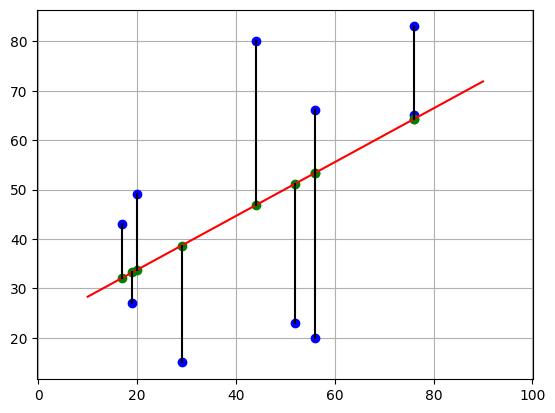

In [16]:
plt.plot(x[:,0],y,"ob")

plt.plot(x[:,0],y_teor_1,"og")

plt.plot([10,90],[model_LR.intercept_ +  10 * model_LR.coef_[0], model_LR.intercept_ +  90 * model_LR.coef_[0]],'r')

for i in range(len(y)):
    plt.plot([x[i,0],x[i,0]],[y[i],y_teor_1[i]],'k')


plt.grid()
plt.axis('equal')
plt.show()

Błąd:

$$
E = \sum_{i=1}^n (y-y_t)^2 = \sum_{i=1}^n (y - f(a,b))^2
$$

Cel uczenia:
- znaleźć takie wartości parametrów $a$ i $b$, dla których $E$ przyjmie wartość minimalną.

Błąd zależy od parametrów $a$ i $b$.

In [17]:
def error_value(a,b,x,y):
    err = 0
    for i in range(len(y)):
        err = err + (y[i] - a * x[i,0] - b)**2
    return err


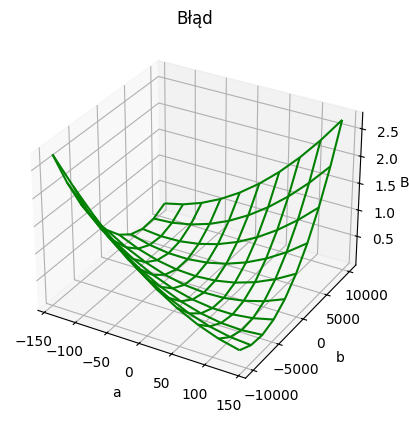

In [18]:
a = np.linspace(-140,140,10)
b = np.linspace(-10000,10000,10)

A,B = np.meshgrid(a,b)
Z = error_value(A,B,x,y)

ax = plt.axes(projection='3d')
ax.plot_wireframe(A, B, Z, color='green')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Błąd')
ax.set_title('Błąd')
plt.show()

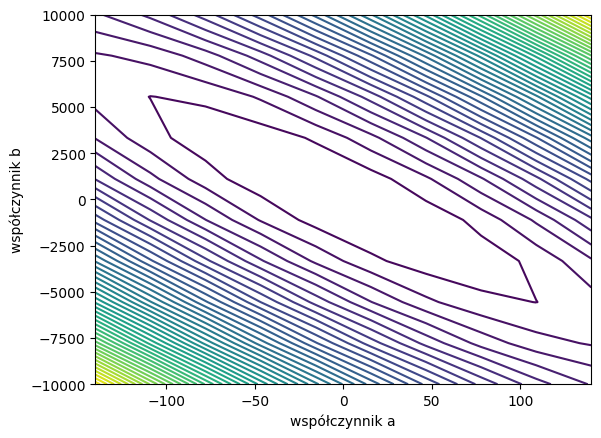

In [19]:
fig, ax = plt.subplots(1, 1)
ax.contour(A, B, Z,50)
ax.set_xlabel('współczynnik a')
ax.set_ylabel('współczynnik b')
plt.show()

Warunek konieczny

$$

\frac{\partial E}{\partial a} = 0 \\ i \\ \frac{\partial E}{\partial b} = 0

$$

$$

\frac{\partial E}{\partial a} = - 2(y_1 - a x_1 -b)x_1 - 2(y_2 - a x_2 - b)x_2 - ...- 2(y_n - a x_n-b)x_n = 0 \\
y_1 x_1 + y_2 x_2 + ... + y_n x_n - a (x_1^2 + x_2^2 + ... + x_n^2) - b (x_1 + x_2 + ... + x_n) = 0 \\
a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i = \sum_{i=1}^n y_i x_i

$$

$$

\frac{\partial E}{\partial b} = -2(y_1 - a x_1 -b) - 2(y_2 - a x_2 - b) - ...- 2(y_n - a x_n-b) = 0 \\
y_1 + y_2 + ... + y_n - a (x_1 + x_2 + ... + x_n) - n b = 0 \\
a \sum_{i=1}^n x_i+ b n = \sum_{i=1}^n y_i

$$

Układ równań:

$$

a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i = \sum_{i=1}^n y_i x_i \\

a \sum_{i=1}^n x_i+ b n = \sum_{i=1}^n y_i
$$

In [20]:
x,y

(array([[52],
        [76],
        [56],
        [19],
        [20],
        [29],
        [76],
        [17],
        [44],
        [56]]),
 array([23, 65, 20, 27, 49, 15, 83, 43, 80, 66]))

In [21]:
suma_x = 0
suma_xx = 0
suma_xy = 0
suma_y = 0

for i in range(len(y)):
    suma_x = suma_x + x[i,0]
    suma_xx = suma_xx + x[i,0] * x[i,0]
    suma_xy = suma_xy + x[i,0] * y[i]
    suma_y = suma_y + y[i]

print("Układ równań:")

print(suma_xx,"* a + ",suma_x,"* b = ",suma_xy)
print(suma_x,"* a + ",len(y),"* b = ",suma_y)


Układ równań:
24355 * a +  445 * b =  23439
445 * a +  10 * b =  471


In [22]:
A = np.array([[suma_xx, suma_x],[suma_x, len(y)]])
b = np.array([suma_xy, suma_y])

print("Macierz współczynników:")
print(A)
print("Wektor wyrazów wolnych:")
print(b)

res = np.linalg.solve(A,b)
print("Rozwiązanie układu rownań:")
print(res)

Macierz współczynników:
[[24355   445]
 [  445    10]]
Wektor wyrazów wolnych:
[23439   471]
Rozwiązanie układu rownań:
[ 0.5446458  22.86326194]


## Metoda najmniejszych kwadratów w zapisie macierzowym

$\bold{X}$ - pierwsza kolumna - jedynki; kolejne kolumny - wartości zmiennych objaśniających

$\bold{Y}$ - wartosci zmiennych objaśnianych

$\bold{B}$ - współczynniki funkjci regresji

$$
B = (\bold{X}^T\bold{X})^{-1}\bold{X}^T\bold{Y}
$$

In [23]:
x = np.ones((len(dane_x),2))
x[:,1] = dane_x

print("Zmienne objaśniające:")
print(x)

print("Zmienna objaśniana:")
y = dane_y.reshape(-1,1)
print(y)

res = np.linalg.inv(x.T @ x) @ x.T @ y

print("Parametry fukcji regresji:")
print(res)

Zmienne objaśniające:
[[ 1. 52.]
 [ 1. 76.]
 [ 1. 56.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 29.]
 [ 1. 76.]
 [ 1. 17.]
 [ 1. 44.]
 [ 1. 56.]]
Zmienna objaśniana:
[[23]
 [65]
 [20]
 [27]
 [49]
 [15]
 [83]
 [43]
 [80]
 [66]]
Parametry fukcji regresji:
[[22.86326194]
 [ 0.5446458 ]]


# Podejście numeryczne do zagadnienia minimalizacji funkcji

## Metoda gradientowa

f(x) =  x**2 - 2
f'(x) =  2*x


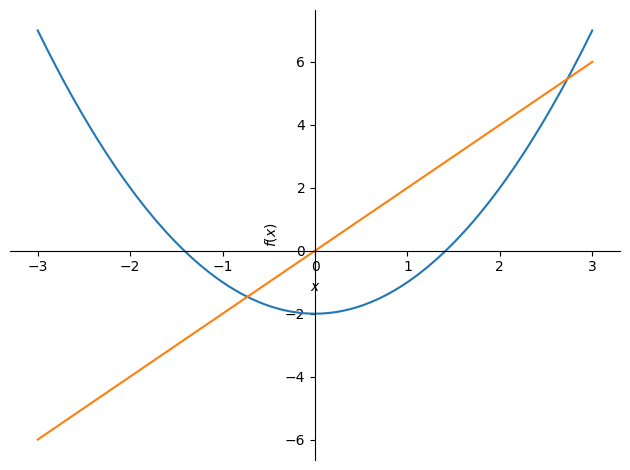

In [24]:
x = sp.symbols('x')

f = x**2-2
print("f(x) = ",f)

fd = sp.diff(f,x)
print("f'(x) = ",fd)

p = sp.plot((f,(x, -3, 3)),(fd,(x,-3,3)))

### Algorytm gradientowy

Cel: minimalizacja funkcji - wyznaczenie wartości parametru, dla którego funkcja przyjmuje wartość minimalną

* Krok 1: wybierz poczatkową wartośc parametru (wartość: $x_0$)
* Krok 2: wyznacz wartość pierwszej pochodnej w tym punkcie
* Krok 3: zmodyfikuj wartość $x$ zgodnie ze wzorem: $x_{i+1} = x_i - \eta f'(x_i)$
* Krok 4: powtarzaj kroki 2 - 3 aż do momentu osiągnięcia zadanej liczby iteracji lub do mementu, gdy wartość $f'(x)$ będzie bardzo mała

Local minimum: 2.00


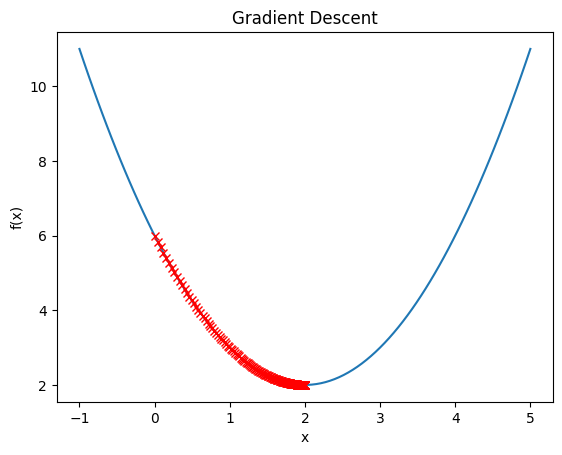

In [25]:
# Source of programs presented below: https://www.tutorialspoint.com/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum

def f(x):
   return x**2 - 4*x + 6

def df(x):
   return 2*x - 4

def gradient_descent(initial_x, learning_rate, num_iterations):
   x = initial_x
   x_history = [x]
  
   for i in range(num_iterations):
       gradient = df(x)
       x = x - learning_rate * gradient
       x_history.append(x)
      
   return x, x_history

initial_x = 0
learning_rate = 0.01
num_iterations = 1000

x, x_history = gradient_descent(initial_x, learning_rate, num_iterations)

print("Local minimum: {:.2f}".format(x))

# Create a range of x values to plot
x_vals = np.linspace(-1, 5, 100)

# Plot the function f(x)
plt.plot(x_vals, f(x_vals))

# Plot the values of x at each iteration
plt.plot(x_history, f(np.array(x_history)), 'rx')

# Label the axes and add a title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')

# Show the plot
plt.show()

Local minimum: -0.03


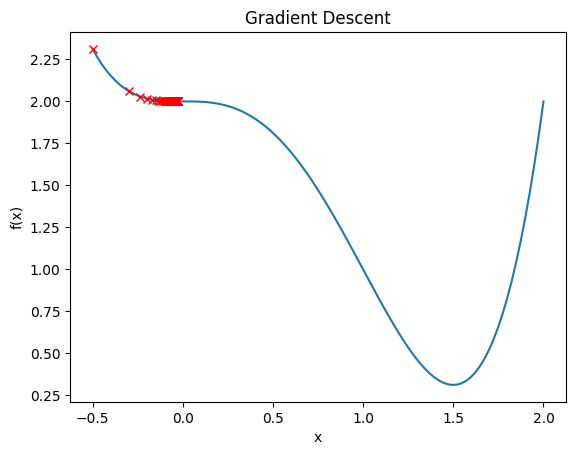

In [26]:
def f(x):
   return x**4 - 2 * x **3 + 2

def df(x):
   return 4 * x**3 - 6 * x**2 

def gradient_descent(initial_x, learning_rate, num_iterations):
   x = initial_x
   x_history = [x]
  
   for i in range(num_iterations):
       gradient = df(x)
       x = x - learning_rate * gradient
       x_history.append(x)
      
   return x, x_history

initial_x = -0.5
learning_rate = 0.1
num_iterations = 50

x, x_history = gradient_descent(initial_x, learning_rate, num_iterations)

print("Local minimum: {:.2f}".format(x))

# Create a range of x values to plot
x_vals = np.linspace(-0.5, 2, 100)

# Plot the function f(x)
plt.plot(x_vals, f(x_vals))

# Plot the values of x at each iteration
plt.plot(x_history, f(np.array(x_history)), 'rx')

# Label the axes and add a title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')

# Show the plot
plt.show()

### Podsumowanie

* Algorytm gradientowy jest przeznaczony do minimalizacji funkcji wypukłych (U - kształtnych)
* Jeżeli funkcja nie jest funkcją wypukłą, to wyznacza minimum lokalne, które nie musi mieć charakteru globalnego
* Współczynnik $\eta$ ma duży wpływ na realizację obliczeń

## Minimalizacja funkcji wielu zmiennych

## Metoda gradientowa w przypadku funkcji wielu zmiennych

Cel: minimalizacja funkcji $f(x_1,x_2, ...,x_n)$.

* Krok 1: wybierz punkt startowy $\mathbf{x}_i = \mathbf{x}_0$,
* Krok 2: wyznacz gradient w tym punkcie $\mathbf{x}_i$,
* Krok 3: zmodyfikuj wartość $\mathbf{x}$ zgodnie z formułą $\mathbf{x}_{i+1} = \mathbf{x}_i - \eta \triangledown f(\mathbf{x}_i)$,
* Krok 4: powtarzaj kroki 2 - 3 aż do osiągnięcia zadanej liczby iteracji lub do momentu, gdy $\triangledown f(\mathbf{x})$ będzie bardzo mały.

Optimal solution:
x =  -0.00036921586630925355     y =  0.00036921586630925355       f(x,y) =  2.726407118689852e-07
History: 
(-8.82, 8.82, 155.5848)
(-8.643600000000001, 8.643600000000001, 149.42364192000002)
(-8.470728000000001, 8.470728000000001, 143.50646569996803)
(-8.301313440000001, 8.301313440000001, 137.8236096582493)
(-8.135287171200002, 8.135287171200002, 132.36579471578264)
(-7.972581427776001, 7.972581427776001, 127.12410924503764)
(-7.813129799220481, 7.813129799220481, 122.08999451893415)
(-7.656867203236072, 7.656867203236072, 117.25523073598437)
(-7.50372985917135, 7.50372985917135, 112.61192359883937)
(-7.353655261987923, 7.353655261987923, 108.15249142432533)
(-7.206582156748165, 7.206582156748165, 103.86965276392206)
(-7.062450513613202, 7.062450513613202, 99.75641451447076)
(-6.921201503340938, 6.921201503340938, 95.80606049969771)
(-6.782777473274119, 6.782777473274119, 92.01214050390968)
(-6.647121923808636, 6.647121923808636, 88.36845973995484)
(-6.514179485332

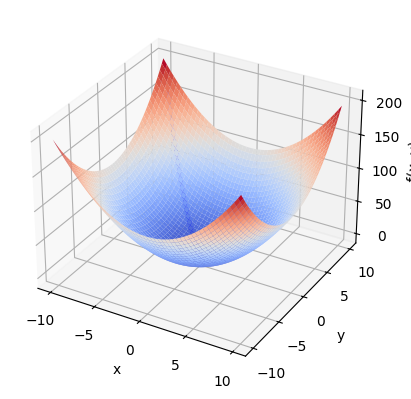

In [27]:
# Soirce: https://induraj2020.medium.com/implementing-gradient-descent-in-python-d1c6aeb9a448

# Define the function to be minimized (a simple quadratic function)
def f(x, y):
    return x**2 + y**2

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2 * x

def df_dy(x, y):
    return 2 * y

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    # Initialize the parameters
    x = start_x
    y = start_y
    history = []
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        
        # Update the parameters
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
        # Save the history of the parameters
        history.append((x, y, f(x, y)))
    
    return x, y, f(x, y), history

# Define the meshgrid for plotting the function
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Perform gradient descent and plot the results
start_x, start_y = -9, 9
learning_rate = 0.01
num_iterations = 500
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate, num_iterations)

print("Optimal solution:")
print("x = ",x_opt,"    y = ", y_opt, "      f(x,y) = ",f_opt)

print("History: ")

for el in history:
    print(el)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='b', marker='x',s = 8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

## Wyznaczanie parametrów funkcji regresji za pomoca metody gradientowej

Funkcja regresji: $y = ax + b$.

Minimalizowana funkcja: $E(a,b) = \frac{\sum_{i=1}^{N}(y_i- f(x_i))^2}{2N} = \frac{\sum_{i=1}^{N}(y_i-b-a x_i)^2}{2N}$

Gradient = $\triangledown E = \begin{bmatrix} \frac{\partial E}{\partial b} \\ \frac{\partial E}{\partial a} \end{bmatrix}$

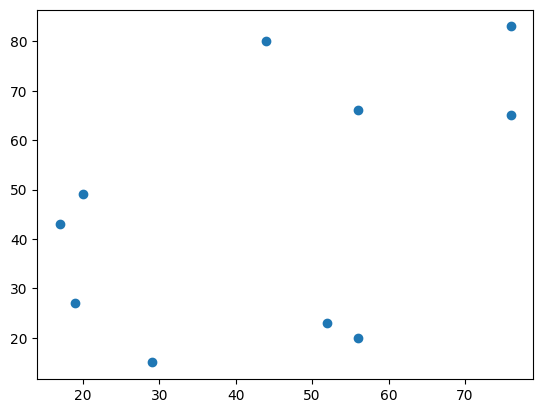

In [28]:
x = dane_x
y = dane_y

plt.scatter(x, y)
plt.show()

In [29]:
x,y

(array([52, 76, 56, 19, 20, 29, 76, 17, 44, 56]),
 array([23, 65, 20, 27, 49, 15, 83, 43, 80, 66]))

In [30]:
# dla i-tego elementu ze zbioru uczącego:
# E = (1/2)*(b[0] + b[1]*x - y)**2
# dE/db[0] = b[0] + b[1]*x - y
# dE/db[1] = (b[0] + b[1]*x - y) * x

def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean() 

In [31]:
def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06):
    vector = start
    for _ in range(n_iter):
        print(vector)
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

In [32]:
res = gradient_descent(ssr_gradient, x, y, start=[10, 0.5], learn_rate=0.0005,n_iter=100000)

print(res)

[10, 0.5]
[10.007425  0.840575]
[10.00726849  0.76624959]
[10.00876581  0.78243743]
[10.00990219  0.77887921]
[10.01111718  0.77962873]
[10.01231488  0.77943849]
[10.01351622  0.77945326]
[10.01471662  0.77942332]
[10.0159171   0.77940313]
[10.01711742  0.77938081]
[10.01831764  0.77935897]
[10.01951774  0.77933702]
[10.02071773  0.77931509]
[10.02191761  0.77929317]
[10.02311738  0.77927125]
[10.02431704  0.77924932]
[10.02551658  0.77922741]
[10.02671601  0.77920549]
[10.02791533  0.77918357]
[10.02911454  0.77916166]
[10.03031364  0.77913975]
[10.03151262  0.77911784]
[10.03271149  0.77909593]
[10.03391025  0.77907403]
[10.0351089   0.77905213]
[10.03630743  0.77903023]
[10.03750586  0.77900833]
[10.03870417  0.77898643]
[10.03990237  0.77896454]
[10.04110046  0.77894264]
[10.04229843  0.77892075]
[10.0434963   0.77889887]
[10.04469405  0.77887698]
[10.04589169  0.7788551 ]
[10.04708922  0.77883321]
[10.04828663  0.77881133]
[10.04948394  0.77878945]
[10.05068113  0.77876758]
[10.05